# Final Project

## Analysis of Legal Outside Counsel Spend

***
##### The main question being asked is what is Grainger's Outside Counsel Spend as of October 2023? 
##### The spend is mainly viewed in two ways: Legal Department Outside Counsel spend, and Company-Wide Outside Counsel spend 
##### There are separate categories for this spend because it is nearly impossible to forecast legal issues that will arise for a company. This is something the company has deemed not estimable. This type of spend is called Invoice Allocation Amt.
##### However, the day-to-day operational spend of the legal department can be forecasted since there should be only a certain amount of that work for any given company. Therefore a budget has been created for this spend type. This type of spend is called Invoice Net spend. During the project we compare the spend of invoice net versus the budget to see how the department is tracking.
##### There are many reasons why a company might have Outside Counsel Spend, some including: 
1. **Specialization and Expertise**: Outside counsel often possess specialized expertise in areas that the in-house legal team may lack. 
2. **Resource Flexibility**: Hiring outside counsel allows companies to manage fluctuating workloads without the need to permanently expand their in-house legal team.
3. **Cost-Effectiveness**: In some cases, it is more cost-effective to hire outside counsel for specific tasks rather than expanding the in-house team or investing in additional training. 
4. **Crisis Management**: In the event of a legal crisis or a public relations issue, outside counsel can provide specialized expertise in managing the situation effectively.
##### Our motivation is aimed to scrutinize Grainger's outside counsel legal spend from 2019 to the current date. To achieve this, we delved into the data, uncovering crucial metrics like annual spending, expenditure per attorney, matter category, project, and law firm. These metrics enabled us to craft visual representations that provided insights into the company's legal spending, highlighting potential areas for cost-efficiency improvements.
##### We have obtained this data through real life expiereince of one of the team members.  It was scrubbed for privacy, with no real names, project names, or law firm names included. The dataset is a mock version of Grainger’s invoice data that has been approved for use by the company.

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
#!pip install openpyxl

***
## Loading Data into the Notebook

In [2]:
Old_Invoices = pd.read_excel("~/classdata/group05/ALL 2019-2021.xlsx", sheet_name='2019-2021', header=2)
PY_Invoices = pd.read_excel("~/classdata/group05/ALL PY.xlsx", sheet_name='ALL PY', header=2)
CY_Invoices = pd.read_excel("~/classdata/group05/ALL CY.xlsx", sheet_name='ALL CY', header=2)
budgets = pd.read_excel("~/classdata/group05/Budget by Senior Leader.xlsx", sheet_name='Budget')

In [3]:
# Load data into notebook
Old_Invoices = pd.read_excel("~/classdata/group05/ALL 2019-2021.xlsx", sheet_name='2019-2021', header=2)
PY_Invoices = pd.read_excel("~/classdata/group05/ALL PY.xlsx", sheet_name='ALL PY', header=2)
CY_Invoices = pd.read_excel("~/classdata/group05/ALL CY.xlsx", sheet_name='ALL CY', header=2)
budgets = pd.read_excel("~/classdata/group05/Budget by Senior Leader.xlsx", sheet_name='Budget')

In [39]:
# Load data into notebook
Old_Invoices = pd.read_excel("/home/masuarez/classdata/group05/ALL 2019-2021.xlsx", sheet_name='2019-2021', header=2)
PY_Invoices = pd.read_excel("/home/masuarez/classdata/group05/ALL PY.xlsx", sheet_name='ALL PY', header=2)
CY_Invoices = pd.read_excel("/home/masuarez/classdata/group05/ALL CY.xlsx", sheet_name='ALL CY', header=2)
budgets = pd.read_excel("/home/masuarez/classdata/group05/Budget by Senior Leader.xlsx", sheet_name='Budget')

In [66]:
# Load data into notebook
Old_Invoices = pd.read_excel("/home/cdoty1/classdata/group05/ALL 2019-2021.xlsx", sheet_name='2019-2021', header=2)
PY_Invoices = pd.read_excel("/home/cdoty1//classdata/group05/ALL PY.xlsx", sheet_name='ALL PY', header=2)
CY_Invoices = pd.read_excel("/home/cdoty1//classdata/group05/ALL CY.xlsx", sheet_name='ALL CY', header=2)
budgets = pd.read_excel("/home/cdoty1//classdata/group05/Budget by Senior Leader.xlsx", sheet_name='Budget')

In [40]:
# Invoice data is separated by year. Append to make one dataframe
all_invoices = pd.concat([Old_Invoices, PY_Invoices, CY_Invoices], ignore_index=True)

In [41]:
all_invoices.head(2)

,Senior Leader,Customer Office Name,Matter Contact,Invoice ID(CounselLink),Invoice ID(LawFirm),Matter Type,Associated Law Firm Office,Matter ID(Customer),Matter Title,Invoice Date,...,Invoice Allocation Contact,Invoice Allocation Contact ID,Invoice Last Charge Date,Invoice Currency,Send Invoice to,Charge Billed Amt,Invoice Allocation Amt (Fees),Invoice Allocation Amt (Expenses),Invoice Allocation Amt,Allocation
0,Senior Leader6,Customer Office Name17,Matter Contact12,70478106,60927955,Litigation > Insured claims and litigation > P...,Associated Law Firm Office28,2020-7563,Matter Title942,2021-01-31 00:00:00,...,NEW Risk Management,9509-57818-10751,NaN,US Dollar,Accounts Payable (AP),2578.0,2578.0,0.0,2578.0,2578.0
1,Senior Leader7,Customer Office Name6,Matter Contact17,67931258,916467,Government Relations > Lobbyists: Registered,Associated Law Firm Office115,2018-4972,Matter Title675,1/1/2020,...,Project E,3603-88834-09030,NaN,NaN,NaN,8500.0,8500.0,0.0,8500.0,8500.0


##### Invoices are tracked in an external invoicing system called "CounselLink". CounselLink allows us to track our spend and create reports that can be exported to Excel for further analysis.

##### In the future, an API to CounselLink would be beneficial to automate common reports or dashboards. However, at the moment there are a lot of manual edits made to the Excel spreadsheet before analysis. This is due to human error in the creation of matters (legal projects) in CounselLink. For example, a wrong category classification.

##### The invoice reports are separated by year because of the manual edits to the raw data. It is easier to process invoices year by year, and once you have "perfected" that year's data, we leave it mostly untouched.

##### The data contains invoice spend information in USD. Invoices are tied to a senior leader (usually the attorney), a Law Firm, a Matter Type (legal project category) which contains a Matter Title as well as additional specifications.

##### This data can be used to determine the outside counsel spend, which can then be compared to the budget to track how the company is keeping up with their initial budget.

***
## Adding Additional "Calculated" Columns

In [42]:
all_invoices[['Matter_L1','Matter_L2', 'Matter_L3', 'Matter_L4']] = all_invoices['Matter Type'].str.split('>',expand=True)

In [43]:
all_invoices.head(2)

,Senior Leader,Customer Office Name,Matter Contact,Invoice ID(CounselLink),Invoice ID(LawFirm),Matter Type,Associated Law Firm Office,Matter ID(Customer),Matter Title,Invoice Date,...,Send Invoice to,Charge Billed Amt,Invoice Allocation Amt (Fees),Invoice Allocation Amt (Expenses),Invoice Allocation Amt,Allocation,Matter_L1,Matter_L2,Matter_L3,Matter_L4
0,Senior Leader6,Customer Office Name17,Matter Contact12,70478106,60927955,Litigation > Insured claims and litigation > P...,Associated Law Firm Office28,2020-7563,Matter Title942,2021-01-31 00:00:00,...,Accounts Payable (AP),2578.0,2578.0,0.0,2578.0,2578.0,Litigation,Insured claims and litigation,Product Liability,General
1,Senior Leader7,Customer Office Name6,Matter Contact17,67931258,916467,Government Relations > Lobbyists: Registered,Associated Law Firm Office115,2018-4972,Matter Title675,1/1/2020,...,NaN,8500.0,8500.0,0.0,8500.0,8500.0,Government Relations,Lobbyists: Registered,None,None


In [44]:
all_invoices['Matter_L1'] = all_invoices['Matter_L1'].str.strip()
all_invoices['Matter_L2'] = all_invoices['Matter_L2'].str.strip()
all_invoices['Matter_L3'] = all_invoices['Matter_L3'].str.strip()
all_invoices['Matter_L4'] = all_invoices['Matter_L4'].str.strip()

##### The Matter Type column is split by the '>' delimiter, creating four columns where there was originally one. This allows us to analyze the different matter levels at each level. Matter Levels are the different legal categories, which get very specific by the fourth level. Splitting them up into their own columns allows us to do a detailed analysis on where and how the money the being spent.

##### Trim New Matter columns so leading and trailing blanks are removed

In [45]:
all_invoices['InvoiceNet'] = all_invoices['Invoice Allocation Amt'] - all_invoices['Allocation']

In [46]:
all_invoices.head(2)

,Senior Leader,Customer Office Name,Matter Contact,Invoice ID(CounselLink),Invoice ID(LawFirm),Matter Type,Associated Law Firm Office,Matter ID(Customer),Matter Title,Invoice Date,...,Charge Billed Amt,Invoice Allocation Amt (Fees),Invoice Allocation Amt (Expenses),Invoice Allocation Amt,Allocation,Matter_L1,Matter_L2,Matter_L3,Matter_L4,InvoiceNet
0,Senior Leader6,Customer Office Name17,Matter Contact12,70478106,60927955,Litigation > Insured claims and litigation > P...,Associated Law Firm Office28,2020-7563,Matter Title942,2021-01-31 00:00:00,...,2578.0,2578.0,0.0,2578.0,2578.0,Litigation,Insured claims and litigation,Product Liability,General,0.0
1,Senior Leader7,Customer Office Name6,Matter Contact17,67931258,916467,Government Relations > Lobbyists: Registered,Associated Law Firm Office115,2018-4972,Matter Title675,1/1/2020,...,8500.0,8500.0,0.0,8500.0,8500.0,Government Relations,Lobbyists: Registered,None,None,0.0


##### Create a new column Invoice Net = Invoice Allocation Amt minus Allocation
##### Invoice Net is the Invoice Allocation Amt (or can be thought of like the Invoice Approved Amt) less the Allocated Amount to the business (eg. the other area in the company). In the CounselLink there is logic where if the "Matter Allocation Contact" column is "Legal Professional Services", then the Allocation is 0. This is true because if the Allocation is on the Legal Professional Team, then they are paying for the services.
##### The Invoice Net is the amount of spend used by the legal department. This is the budgeted and forecasted amount.

In [47]:
# Create 'Year' and 'Quarter' columns
# Ensure 'Invoice Date' is a datetime type
all_invoices['Invoice Date'] = pd.to_datetime(all_invoices['Invoice Date'], errors='coerce')

# Now that 'Invoice Date' is definitely a datetime type, create 'Year' and 'Quarter' columns
all_invoices['Year'] = all_invoices['Invoice Date'].dt.year
all_invoices['Quarter'] = all_invoices['Invoice Date'].dt.to_period('Q')

In [48]:
all_invoices.head(2)

,Senior Leader,Customer Office Name,Matter Contact,Invoice ID(CounselLink),Invoice ID(LawFirm),Matter Type,Associated Law Firm Office,Matter ID(Customer),Matter Title,Invoice Date,...,Invoice Allocation Amt (Expenses),Invoice Allocation Amt,Allocation,Matter_L1,Matter_L2,Matter_L3,Matter_L4,InvoiceNet,Year,Quarter
0,Senior Leader6,Customer Office Name17,Matter Contact12,70478106,60927955,Litigation > Insured claims and litigation > P...,Associated Law Firm Office28,2020-7563,Matter Title942,2021-01-31,...,0.0,2578.0,2578.0,Litigation,Insured claims and litigation,Product Liability,General,0.0,2021,2021Q1
1,Senior Leader7,Customer Office Name6,Matter Contact17,67931258,916467,Government Relations > Lobbyists: Registered,Associated Law Firm Office115,2018-4972,Matter Title675,2020-01-01,...,0.0,8500.0,8500.0,Government Relations,Lobbyists: Registered,None,None,0.0,2020,2020Q1


##### Create 'Year' and 'Quarter' columns
##### After combining the sources, we added year and quarter columns so we are able to do a time-analysis.

***
### Create a YTD data frame for time analysis

In [49]:
# Convert 'Invoice Date' to datetime
all_invoices['Invoice Date'] = pd.to_datetime(all_invoices['Invoice Date'])

# Filter the DataFrame to include only year-to-date data
YTD_all_invoices = all_invoices[(all_invoices['Invoice Date'] >= datetime(datetime.now().year, 1, 1)) & (all_invoices['Invoice Date'] <= datetime.now())]

In [50]:
YTD_all_invoices.head(2)

,Senior Leader,Customer Office Name,Matter Contact,Invoice ID(CounselLink),Invoice ID(LawFirm),Matter Type,Associated Law Firm Office,Matter ID(Customer),Matter Title,Invoice Date,...,Invoice Allocation Amt (Expenses),Invoice Allocation Amt,Allocation,Matter_L1,Matter_L2,Matter_L3,Matter_L4,InvoiceNet,Year,Quarter
9470,Senior Leader8,Customer Office Name11,Matter Contact20,75623828,N23030016,Commercial Contracts and Counseling,Associated Law Firm Office85,0900318,Matter Title1131,2023-03-06,...,0.0,2457.0,0.0,Commercial Contracts and Counseling,None,None,None,2457.0,2023,2023Q1
9471,Senior Leader1,Customer Office Name11,Matter Contact8,75622934,1000241532,IP,Associated Law Firm Office53,1201397,Matter Title1091,2023-02-02,...,0.0,27757.0,0.0,IP,None,None,None,27757.0,2023,2023Q1


##### Create a new dataframe that is YTD invoices only. We can do this by filtering on the "Invoice Date" This will help for the budget analysis that is based off this year only. This can be different than the CY report. Company best practice is to combine and filter.
##### Created code that allows YTD to stay updated with the year and will not need to be updated when 2024 starts.

***
### What is the YTD spend? Company-wide legal spend? And, legal department spend?

In [51]:
# Calculating the sum of the 'InvoiceNet' column
YTD_invoice_net_sum = YTD_all_invoices['InvoiceNet'].sum()

# Calculating the sum of the 'Invoice Allocation Amt' column
invoice_allocation_amt_sum = YTD_all_invoices['Invoice Allocation Amt'].sum()

print(f"YTD Invoice Approved Spend: ${invoice_allocation_amt_sum:,.2f}")
print(f"YTD Invoice Net Spend: ${YTD_invoice_net_sum:,.2f}")

YTD Invoice Approved Spend: $9,364,442.25
YTD Invoice Net Spend: $2,755,210.62


##### The first step to see what current total spend has been this year for the company (invoice allocation amt) versus what the legal department has spent (invoice net)

### What is the budget by senior leader?

In [52]:
budgets['Budget'] = budgets['Budget'].astype(float)
budgets['Budget'] = budgets['Budget'].round(2)

budgets.head(2)

,Year,Senior Leader,Budget
0,2018-01-01,Senior Leader1,3757929.81
1,2018-01-01,Senior Leader3,129059.99


##### Budgets are tied to a Senior Leader, or lead attorney. Although legal matters are better tracked by the Matter Type (category), like the invoicing system, the budget is best tracked to the leader for accountability of spend.

***
### What is the YTD Budget by senior leader?|

In [53]:
# Filter the DataFrame for the current year (YTD)
ytd_budgets = budgets[budgets['Year'].dt.year == datetime.now().year]

ytd_budgets

,Year,Senior Leader,Budget
25,2023-01-01,Senior Leader1,2252735.00
26,2023-01-01,Senior Leader3,147844.96
27,2023-01-01,Senior Leader5,146917.50
28,2023-01-01,Senior Leader6,489725.00
29,2023-01-01,Senior Leader7,832532.50
30,2023-01-01,Senior Leader8,930477.50
31,2023-01-01,Senior Leader2,97945.00


##### Create a YTD dataframe of the Budget file for comparison against current spend.

***
### How does the current legal department spend compare to the budget for 2023?

In [54]:
# Calculate the sum of the 'Budget' column
YTDbudget_sum = ytd_budgets['Budget'].sum()
print(f"YTD Budget: ${YTDbudget_sum:,.2f}")
print(f"YTD Invoice Net Spend: ${YTD_invoice_net_sum:,.2f}")

YTD Budget: $4,898,177.46
YTD Invoice Net Spend: $2,755,210.62


In [55]:
# Calculate the percentage of the budget remaining
percent_remaining = (YTD_invoice_net_sum / YTDbudget_sum) * 100
print(f"Percentage of Spend Left in the Year: {percent_remaining:.2f}%")

Percentage of Spend Left in the Year: 56.25%


##### This invoice data has been captured in late October of 2023. With about 80% of the year completed, we can assume we are on a good track for the end of the year, even with Q4 being a high spend time.
##### Now we would like to dig into the data more. For example, How did we get to where we are Year-to-Date? Who has spent the most so far? What have we spent our money on? What have our biggest projects been?

In [56]:
# Group by 'Senior Leader' in the YTD_all_invoices DataFrame and calculate the sum of 'InvoiceNet'
invoice_net_by_leader = YTD_all_invoices.groupby('Senior Leader')['InvoiceNet'].sum().reset_index()

# Merge the aggregation result back into the ytd_budgets DataFrame
ytd_budgets = pd.merge(ytd_budgets, invoice_net_by_leader, on='Senior Leader', how='left')
ytd_budgets['InvoiceNet'] = ytd_budgets['InvoiceNet'].astype(float)
ytd_budgets['InvoiceNet'] = ytd_budgets['InvoiceNet'].round(2)
ytd_budgets

,Year,Senior Leader,Budget,InvoiceNet
0,2023-01-01,Senior Leader1,2252735.00,1796878.74
1,2023-01-01,Senior Leader3,147844.96,58822.63
2,2023-01-01,Senior Leader5,146917.50,0.00
3,2023-01-01,Senior Leader6,489725.00,273760.77
4,2023-01-01,Senior Leader7,832532.50,294251.17
5,2023-01-01,Senior Leader8,930477.50,275540.97
6,2023-01-01,Senior Leader2,97945.00,55956.34


##### Performed groupby on Senior Leader by Invoice Net in the YTD Outside Counsel spend data frame
##### Merged groupby with YTD budget data frame so we can see how each much each leader has spent.

***
### What is the percent budget remaining for each senior leader?

In [57]:
# Add the new column '%Remaining'
ytd_budgets['%Remaining'] = (((1- ytd_budgets['InvoiceNet'] / ytd_budgets['Budget'])) * 100).fillna(0).round(2)
ytd_budgets

,Year,Senior Leader,Budget,InvoiceNet,%Remaining
0,2023-01-01,Senior Leader1,2252735.00,1796878.74,20.24
1,2023-01-01,Senior Leader3,147844.96,58822.63,60.21
2,2023-01-01,Senior Leader5,146917.50,0.00,100.00
3,2023-01-01,Senior Leader6,489725.00,273760.77,44.10
4,2023-01-01,Senior Leader7,832532.50,294251.17,64.66
5,2023-01-01,Senior Leader8,930477.50,275540.97,70.39
6,2023-01-01,Senior Leader2,97945.00,55956.34,42.87


##### Added %Remaining column so leaders know how much left they have in their budget for the last portion of the year

***
### How much have I spent so far this year? How much of my budget do I have left?

In [69]:
def budgetCheck():
    leader = input("Leader Name: ")
    
    temp = ytd_budgets.loc[ytd_budgets['Senior Leader'] == leader ]
    
    spent = temp.Budget - temp.InvoiceNet
    spentValue = pd.DataFrame(spent)
    spentValue = spentValue[0].iloc[0]
    
    remaining = (((1- temp['InvoiceNet'] / temp['Budget'])) * 100).fillna(0).round(2)
    remainingValue = pd.DataFrame(remaining)
    remainingValue = remainingValue[0].iloc[0]
    
    print("You have spent", spentValue, "dollars so far this year, which is", remainingValue, "percent of your yearly budget.")

In [71]:
budgetCheck()

Leader Name:  Senior Leader1


You have spent 455856.26 dollars so far this year, which is 20.24 percent of your yearly budget.


##### This defined function allows a senior leader to put their name into budgetCheck and it will tell them their Invoice Net spend and the percent budget used for this year. This is a useful function to keep on hand so leaders can be aware of their stance at any given point.

***
### What is the YTD spend by Matter Level 1?

In [58]:
# Group by 'Matter_L1' and sum 'Invoice Allocation Amt' and 'Allocation'
Matter_L1_YTD = YTD_all_invoices.groupby('Matter_L1')[['Invoice Allocation Amt', 'Allocation', 'InvoiceNet']].sum()

# Add a 'Total' row at the bottom
totals = Matter_L1_YTD.sum().rename('Total')
grouped_with_totals = pd.concat([Matter_L1_YTD, pd.DataFrame([totals])])

# Format the numbers in the DataFrame as currency
Matter_L1_YTD = grouped_with_totals.applymap(lambda x: f"${x:,.2f}")

Matter_L1_YTD

,Invoice Allocation Amt,Allocation,InvoiceNet
Commercial Contracts and Counseling,"$222,263.26","$4,080.36","$218,182.90"
Compliance,"$158,821.75","$74,229.21","$84,592.54"
Corporate and Securities,"$491,911.65","$102,281.68","$389,629.97"
Global Trade Compliance,$609.00,$0.00,$609.00
Government Contracting & Counseling,"$222,044.97","$9,859.00","$212,185.97"
Government Relations,"$576,382.24","$576,382.24",$0.00
IP,"$892,134.69","$22,954.55","$869,180.14"
IT,"$560,955.46",$0.00,"$560,955.46"
Internal Investigations/Reviews,"$240,450.00","$240,450.00",$0.00
Labor and Employment,"$880,577.65","$746,755.02","$133,822.63"


##### Create groupby table to show Year-to-Date spend by Matter Level 1. Matter Levels are the categories for legal matters (projects). This breakdown is essential for upper management to display where the spend is going, and which categories require the most amount of resources.

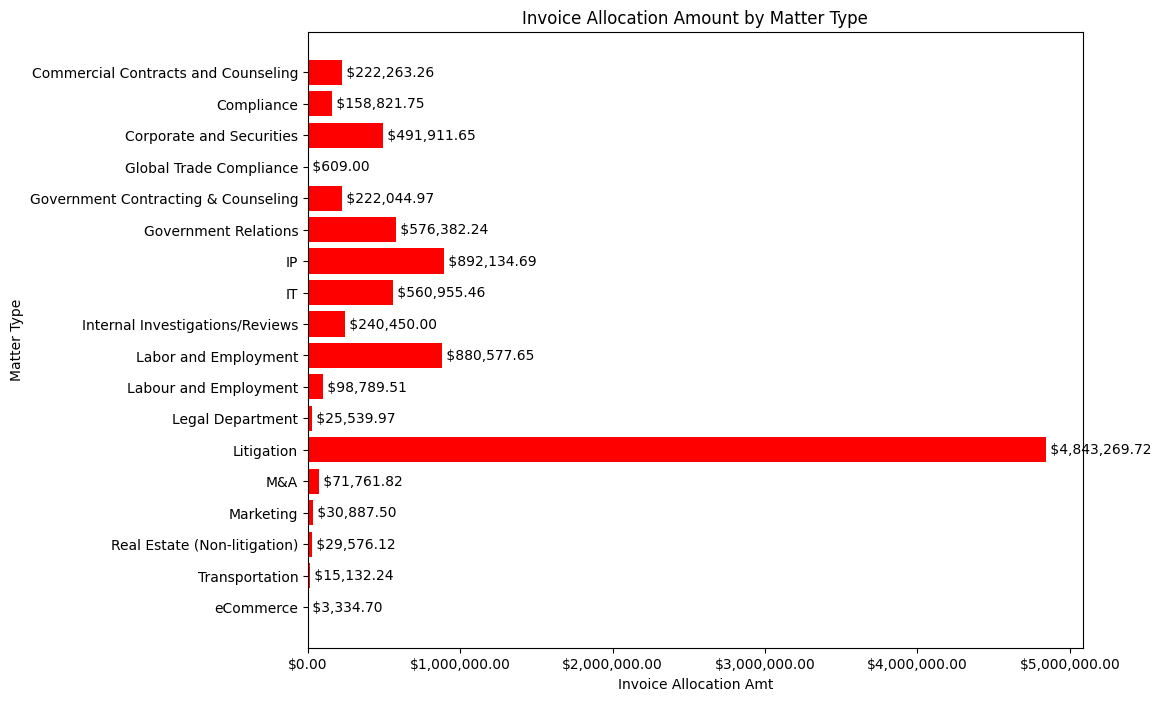

In [59]:
# Ensure that 'Invoice Allocation Amt' is a float for plotting
Matter_L1_YTD['Invoice Allocation Amt'] = Matter_L1_YTD['Invoice Allocation Amt'].replace('[\$,]', '', regex=True).astype(float)

# Plotting
plt.figure(figsize=(10, 8))  # Set the figure size
bars = plt.barh(Matter_L1_YTD[:-1].index, Matter_L1_YTD[:-1]['Invoice Allocation Amt'], color='red')  # Create horizontal red bars

# Format the x-axis tick labels as currency
formatter = ticker.FuncFormatter(lambda x, p: f'${x:,.2f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Add the value labels at the end of each bar
for bar in bars:
    plt.text(
        bar.get_width(),  # Get the end of the bar
        bar.get_y() + bar.get_height() / 2,  # Get the y-coordinate for the text
        f' ${bar.get_width():,.2f}',  # Format the number as currency
        va='center',  # Center alignment for the vertical axis
        color='black'
    )

# Set labels and title
plt.xlabel('Invoice Allocation Amt')
plt.ylabel('Matter Type')
plt.title('Invoice Allocation Amount by Matter Type')

# Invert y-axis to have the largest bar on top
plt.gca().invert_yaxis()

# Show the plot
plt.show()

##### This analysis by Matter Level 1 is important because it allows upper management to see the spend by the different legal categories established by the company. Since this analysis is by the invoice allocation amount it is representative of the company-wide legal outside counsel spend. Litigation has extremely high spend in comparison to other categories because of a major lawsuit.

***
### What is the YTD spend by Matter levels 1 & 2?

In [60]:
# Group by 'Matter_L1' and 'Matter_L2' in the YTD_all_invoices DataFrame
Matter_L2_YTD = YTD_all_invoices.groupby(['Matter_L1', 'Matter_L2'])[['Invoice Allocation Amt', 'Allocation', 'InvoiceNet']].sum().reset_index()

# Add a 'Total' row at the bottom
totals = Matter_L2_YTD.sum(numeric_only=True)
totals['Matter_L1'] = 'Total'
totals['Matter_L2'] = ''

# Append the totals row to the grouped DataFrame
Matter_L2_YTD = pd.concat([Matter_L2_YTD, pd.DataFrame([totals])], ignore_index=True)

# Format the numbers in the DataFrame as currency
columns_to_format = ['Invoice Allocation Amt', 'Allocation', 'InvoiceNet']
for column in columns_to_format:
    Matter_L2_YTD[column] = Matter_L2_YTD[column].apply(lambda x: f"${x:,.2f}")

Matter_L2_YTD

,Matter_L1,Matter_L2,Invoice Allocation Amt,Allocation,InvoiceNet
0,Commercial Contracts and Counseling,Customer Agreements,$0.00,$0.00,$0.00
1,Commercial Contracts and Counseling,Services,"$129,059.90",$0.00,"$129,059.90"
2,Compliance,Anti-Bribery,"$53,557.54",$0.00,"$53,557.54"
3,Compliance,Privacy & Data Collection,"$15,264.89","$15,264.89",$0.00
4,Compliance,Regulatory Compliance,"$58,964.33","$58,964.33",$0.00
5,Corporate and Securities,Bankruptcy,"$120,000.00",$0.00,"$120,000.00"
6,Corporate and Securities,Corporate Governance,"$50,368.00",$0.00,"$50,368.00"
7,Corporate and Securities,Credit & Collections,$0.00,$0.00,$0.00
8,Corporate and Securities,Legal Entity Management,"$196,172.83","$78,438.00","$117,734.83"
9,Corporate and Securities,Securities,"$44,160.00",$0.00,"$44,160.00"


##### Upper management will often like to go one layer deeper in order to get a sense for what the Legal Matters are about. It provides a deeper sense for the nature of the matter. Notice that the total in this output does not match the total in the Matter_L1 only output. This is because not every project is assigned a level 2 detail. The deeper the levels you go, the less matters assigned to that level.
##### Typically upper management will only like to see as deep as level 2, after that they'd rather see large projects.

***
### What are the top legal matters this year?

In [61]:
# Group by 'Matter Title' and sum the relevant columns
top_20_matters = YTD_all_invoices.groupby('Matter Title')[['Invoice Allocation Amt', 'Allocation', 'InvoiceNet']].sum()

top_20_matters = top_20_matters.sort_values('InvoiceNet', ascending=False).head(20)

# Add a 'Total' row at the bottom
totals = top_20_matters.sum().rename('Total')
top_20_matters = pd.concat([top_20_matters, pd.DataFrame([totals])])

# Format the numbers in the DataFrame as currency
columns_to_format = ['Invoice Allocation Amt', 'Allocation', 'InvoiceNet']
for column in columns_to_format:
    top_20_matters[column] = top_20_matters[column].apply(lambda x: f"${x:,.2f}")

top_20_matters

,Invoice Allocation Amt,Allocation,InvoiceNet
Matter Title44,"$666,666.64",$0.00,"$666,666.64"
Matter Title1244,"$533,336.00",$0.00,"$533,336.00"
Matter Title1579,"$187,499.97",$0.00,"$187,499.97"
Matter Title31,"$129,059.90",$0.00,"$129,059.90"
Matter Title1091,"$120,649.50",$0.00,"$120,649.50"
Matter Title1918,"$112,297.12",$0.00,"$112,297.12"
Matter Title363,"$92,340.00",$0.00,"$92,340.00"
Matter Title29,"$80,000.00",$0.00,"$80,000.00"
Matter Title505,"$75,000.00",$0.00,"$75,000.00"
Matter Title1372,"$53,557.54",$0.00,"$53,557.54"


##### Analysis by Matter Title, or project, allows management to see the top 20 major projects for this year and how much is the spend. This table is by Invoice Net amt; this would be the amount spent by the legal department. This is important for budgeting purposes, too. The projects with the highest invoice net would be the easiest to decrease spend from when looking for savings.

***
### What are the fees on this Matter?

In [ ]:
def feeAnalysis(df):
    highFees = []
    medFees = []
    noFees = []

    for index, row in df[['Matter Title','Invoice Allocation Amt (Fees)','Invoice Allocation Amt (Expenses)']].iterrows():
        if row[1] == 0:
            noFees.append(row[0])
        elif 0 < row[1] < 5000:
            medFees.append(row[0])
        elif row[1] >= 5000:
            highFees.append(row[0])
            
    print("There are", len(noFees), "matters with no allocated fees. \n There are", len(medFees), 
          "matters with allocated fees below $5000. \n There are", len(highFees), 
          "matters with allocated fees at or above $5000.")
    
    matterTitle = input("Matter Title: ")
    
    tempDF = df.loc[df['Matter Title'] == matterTitle ]
    matterFeeAmt = tempDF['Invoice Allocation Amt (Fees)'].iloc[0]
    # remainingValue = pd.DataFrame(remaining)
    # remainingValue = remainingValue[0].iloc[0]
    
    print('The allocated fee amount for
          ', matterTitle, 'is', matterFeeAmt, 'dollars.')

In [87]:
feeAnalysis(all_invoices)

There are 3006 matters with no allocated fees. 
 There are 6514 matters with allocated fees below $5000. 
 There are 1512 matters with allocated fees at or above $5000.


Matter Title:  Matter Title942


The allocated fee amount for Matter Title942 is 2578.0 dollars.


##### Fees are sometimes amounts that are negotiable when it comes to invoicing from the law firms. Due to this, it is important to know where the most fees are being accrued and what the fees assigned to each matter are. This function makes it easy to quickly identify the exact fee amount of any matter just by looking up the Matter Title. The Senior Leader can then decide whether or not to pursue negotiations to lower fees, and overall cost of the matter's legal expenses, or not.

***
### What law firm is assigned to this matter? And, how much approved spend to we have on the project?

In [74]:
def LawFirmLookup(matter):

    for index, row in all_invoices[['Matter Title','Associated Law Firm Office', 
                                    'Invoice Date', 'Invoice Allocation Amt']].iterrows():
        if row[0] == matter:
            firm = row[1]
            date = row[2]
            amount = row[3]
    
    print("The firm assigned to", matter, "is", firm, "\n On", date, "we were billed", amount, 
          "for this outside legal counsel matter.")

In [75]:
LawFirmLookup('Matter Title942')

The firm assigned to Matter Title942 is Associated Law Firm Office28 
 On 2021-01-31 00:00:00 we were billed 2578.0 for this outside legal counsel matter.


##### This is a useful defined function because it allows the leaders to look up a project by name it will give them the law firm assigned, the invoice date, and approved amount.

***
### What is the spend by year?

In [62]:
# Group by 'Year' and calculate the sum for the relevant columns
grouped_by_year = all_invoices.groupby('Year')[['Invoice Allocation Amt', 'Allocation', 'InvoiceNet']].sum().reset_index()

# Format the columns as currency
for column in ['Invoice Allocation Amt', 'Allocation', 'InvoiceNet']:
    grouped_by_year[column] = grouped_by_year[column].apply(lambda x: f"${x:,.2f}")

grouped_by_year

,Year,Invoice Allocation Amt,Allocation,InvoiceNet
0,2019,"$7,662,073.93","$3,383,090.58","$4,278,983.35"
1,2020,"$12,715,609.32","$8,083,621.55","$4,631,987.77"
2,2021,"$14,936,588.03","$9,584,319.45","$4,971,289.52"
3,2022,"$19,664,196.80","$14,624,502.26","$5,039,694.54"
4,2023,"$9,364,442.25","$6,609,231.64","$2,755,210.62"


##### Spend by Year shows the comparison of the spend from 2019-2023. Spend has generally been on the rise for the company as a whole, and within the legal department.

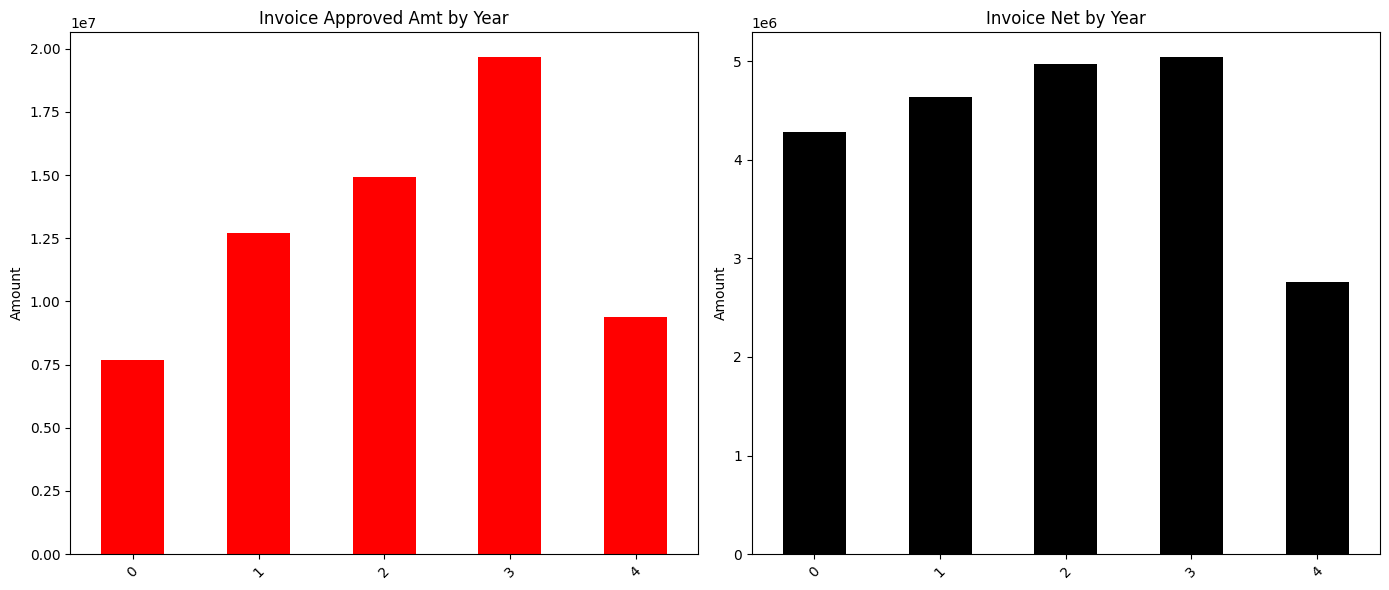

In [63]:
grouped_by_year['Invoice Allocation Amt'] = grouped_by_year['Invoice Allocation Amt'].replace('[\$,]', '', regex=True).astype(float)
grouped_by_year['InvoiceNet'] = grouped_by_year['InvoiceNet'].replace('[\$,]', '', regex=True).astype(float)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot Invoice Allocation Amt by Year
grouped_by_year['Invoice Allocation Amt'].plot(kind='bar', ax=axes[0], color='r')
axes[0].set_title('Invoice Approved Amt by Year')
axes[0].set_ylabel('Amount')
axes[0].tick_params(axis='x', rotation=45)

# Plot InvoiceNet by Year
grouped_by_year['InvoiceNet'].plot(kind='bar', ax=axes[1], color='black')
axes[1].set_title('Invoice Net by Year')
axes[1].set_ylabel('Amount')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()

plt.show()

##### This graph confirms that spend has been increasing since 2019. However, this can generally be explained from a single lawsuit. The invoice net amount, or the amount spent by the legal department has been on the rise as well, but in comparison mostly consistent. This is an important, and good, finding given the large lawsuit and growing company.

***
### What is a year-over-year comparison for the budgets?

In [64]:
budgets['Year'] = pd.to_datetime(budgets['Year'])
budgets['Year'] = budgets['Year'].dt.year
grouped_budgets = budgets.groupby('Year')['Budget'].sum().reset_index()
grouped_budgets['Budget'] = grouped_budgets['Budget'].apply(lambda x: f"${x:,.2f}")
grouped_budgets

,Year,Budget
0,2018,"$6,067,000.00"
1,2019,"$5,897,999.99"
2,2020,"$5,801,000.00"
3,2021,"$5,155,000.00"
4,2022,"$4,897,250.00"
5,2023,"$4,898,177.46"


##### This table shows that in general, the budgets have been decreasing since 2018. This is difficult to maintain with the growing spend of the company and the legal department.

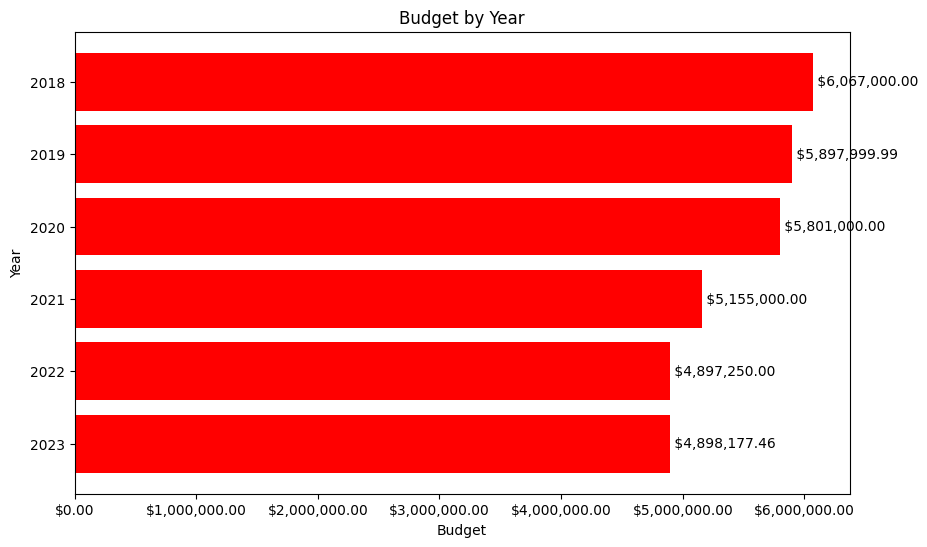

In [65]:
# Create a horizontal bar chart
plt.figure(figsize=(10, 6))  # Set the figure size
bars = plt.barh(grouped_budgets['Year'].astype(str), grouped_budgets['Budget'].replace('[\$,]', '', regex=True).astype(float), color='red')

# Format the x-axis tick labels as currency
formatter = ticker.FuncFormatter(lambda x, p: f'${x:,.2f}')
plt.gca().xaxis.set_major_formatter(formatter)

# Add the value labels at the end of each bar
for bar in bars:
    plt.text(
        bar.get_width(),  # Get the end of the bar
        bar.get_y() + bar.get_height() / 2,  # Get the y-coordinate for the text
        f' ${bar.get_width():,.2f}',  # Format the number as currency
        va='center',  # Center alignment for the vertical axis
        color='black',  # Set the text color to black for better readability
        fontsize=10,  # Optional: Adjust the fontsize if needed
        ha='left'  # Horizontal alignment is set to left
    )

# Set labels and title
plt.xlabel('Budget')
plt.ylabel('Year')
plt.title('Budget by Year')

# Invert y-axis to have the largest bar on top if desired
plt.gca().invert_yaxis()

# Show the plot
plt.show()

##### This graph is a visual representation of the the data table. This visual makes it clear that the budget has been decreasing from 2018 to present.

***
### What is the outside counsel spend by quarter & year?

In [66]:
# Group by 'Quarter' and calculate the sum for the relevant columns
grouped_by_quarter = all_invoices.groupby('Quarter')[['Invoice Allocation Amt', 'Allocation', 'InvoiceNet']].sum().reset_index()

# Format the columns as currency
for column in ['Invoice Allocation Amt', 'Allocation', 'InvoiceNet']:
    grouped_by_quarter[column] = grouped_by_quarter[column].apply(lambda x: f"${x:,.2f}")

grouped_by_quarter

,Quarter,Invoice Allocation Amt,Allocation,InvoiceNet
0,2019Q1,"$1,419,765.45","$577,246.94","$842,518.51"
1,2019Q2,"$1,664,190.05","$624,996.61","$1,039,193.45"
2,2019Q3,"$1,283,873.24","$506,439.73","$777,433.51"
3,2019Q4,"$3,294,245.18","$1,674,407.30","$1,619,837.88"
4,2020Q1,"$3,184,449.43","$2,223,819.13","$960,630.30"
5,2020Q2,"$4,018,756.50","$2,486,184.57","$1,532,571.93"
6,2020Q3,"$2,760,836.66","$1,605,991.76","$1,154,844.90"
7,2020Q4,"$2,751,566.73","$1,767,626.10","$983,940.63"
8,2021Q1,"$2,303,589.69","$1,285,600.13","$937,912.46"
9,2021Q2,"$3,786,844.01","$2,332,220.00","$1,345,084.85"


##### Spend by Quarter table contains data from all tracked invoices from in CounselLink. The go-live for this system was 2019.

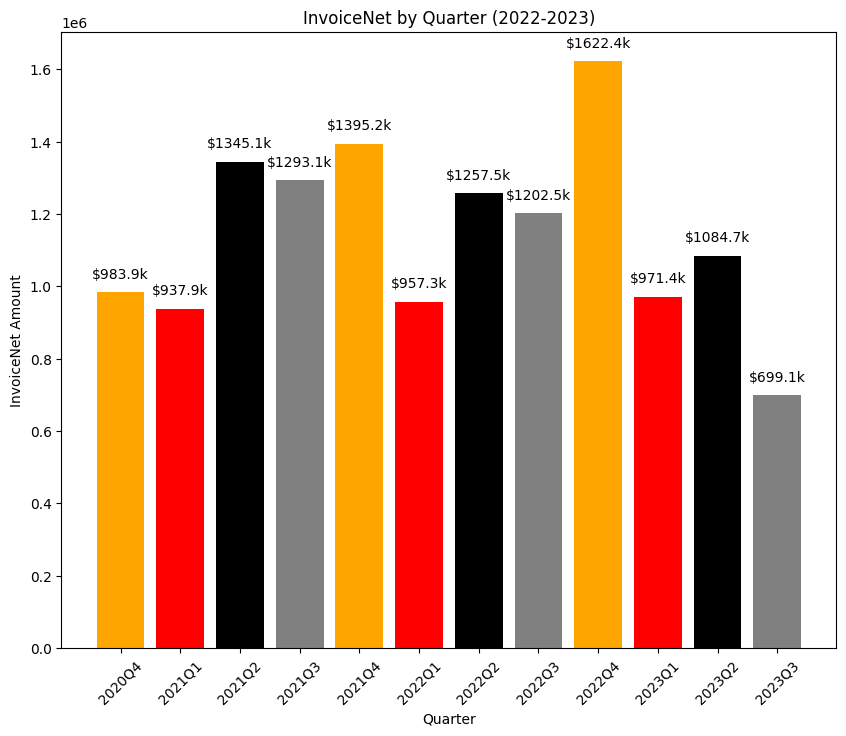

In [67]:
df_last_7 = grouped_by_quarter.tail(12).copy()

# Convert 'Quarter' from PeriodIndex to string
df_last_7['Quarter'] = df_last_7['Quarter'].astype(str)

# Define a color map for the quarters
colors = {'Q1': 'red', 'Q2': 'black', 'Q3': 'grey', 'Q4': 'orange'}

# Map the quarters to the appropriate colors
quarter_colors = df_last_7['Quarter'].apply(lambda x: colors[x[-2:]])

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(10, 8))

# Clean 'InvoiceNet' column and convert to float for plotting
df_last_7['InvoiceNet'] = df_last_7['InvoiceNet'].replace('[\$,]', '', regex=True).astype(float)

# Create the bar chart with labels
for i, quarter in enumerate(df_last_7['Quarter']):
    value = df_last_7['InvoiceNet'].iloc[i]
    ax.bar(quarter, value, color=quarter_colors.iloc[i])
    # Format the label
    label = f'${value/1000:.1f}k'
    ax.annotate(label,                       
                (quarter, value),            
                textcoords="offset points",  
                xytext=(0,10),               
                ha='center')                 

# Set the title and labels
ax.set_title('InvoiceNet by Quarter (2022-2023)')
ax.set_xlabel('Quarter')
ax.set_ylabel('InvoiceNet Amount')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

##### This is a visual of the spend by quarter data table. This visual is focused on the last 12 quarters. A notable point from this visual is that the most spend for the year typically happens in Q4. This usually correlates to an increase in workload, too. It is important to have ample resources in Q4.

***
### Matter and Budget Distribution

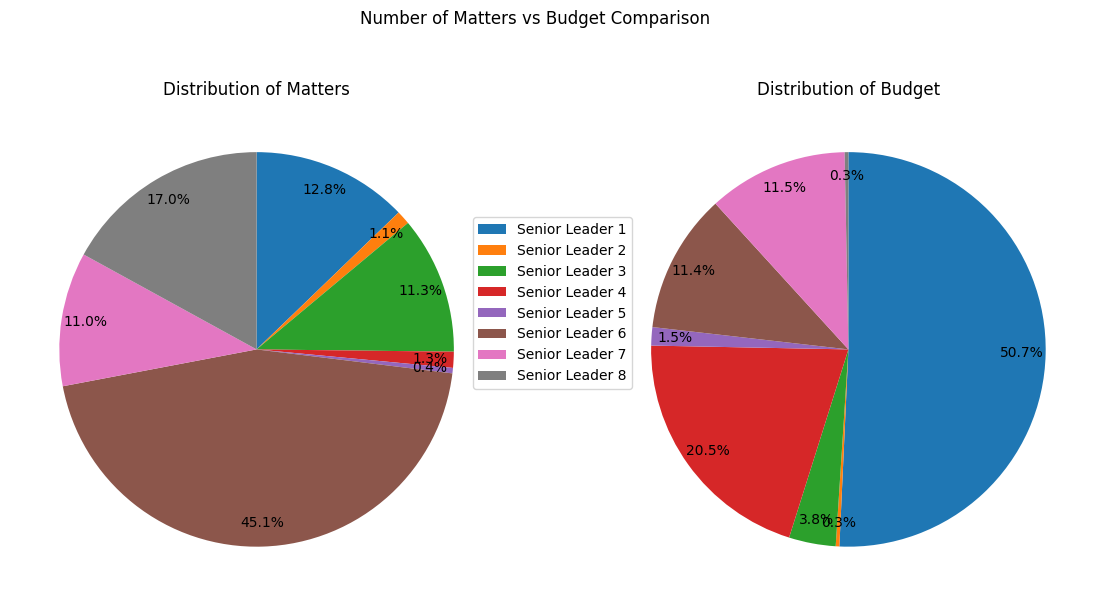

In [68]:
fig, axs = plt.subplots(1, 2, figsize=(14,7))
ax1 = axs[0]
ax2 = axs[1]

countMatters = all_invoices['Senior Leader'].value_counts().sort_index()
budgetByLeader = budgets.groupby("Senior Leader")['Budget'].sum().sort_index()

labels = ['Senior Leader 1', 'Senior Leader 2', 'Senior Leader 3', 'Senior Leader 4',
          'Senior Leader 5', 'Senior Leader 6', 'Senior Leader 7', 'Senior Leader 8']

# Pie chart on the left for Matter Count by Leader
ax1.pie(countMatters,
       autopct='%.1f%%', pctdistance=0.88, 
       startangle=90, counterclock=False)
ax1.set_title('Distribution of Matters')

# Pie chart on the right for passengers Budget Total by Leader
ax2.pie(budgetByLeader,
       autopct='%.1f%%', pctdistance=0.88,
       startangle=90, counterclock=False)
ax2.set_title('Distribution of Budget')

# Show the plot
plt.figlegend(labels, loc = "center")
plt.suptitle("Number of Matters vs Budget Comparison")
plt.show()

##### The visual displays a pair of pie charts side by side under the title "Number of Matters vs Budget Comparison." These charts are used to compare the distribution of "Matters" and "Budget" across what appears to be different senior leaders in an organization.

##### On the left, the pie chart titled "Distribution of Matters" shows the percentage of matters handled by each senior leader. The chart segments are color-coded and labeled with percentages to represent each leader's share of the total number of matters.

##### On the right, the chart titled "Distribution of Budget" reflects the allocation of budget among the same senior leaders.

##### By comparing both charts, management can analyze how the number of matters relates to the budget distribution. It appears that there is not much of a correlation between the number of matters a leader has versus the size of their budget.

***
## Obstacles

In this analysis, we were utilizing a real-world (mock) dataset. While the data was generally clean, it still required a bit of preprocessing and cleaning on our end in order to get all of the necessary data into one easily to analyze dataframe.
- Formatting data within a dataframe
    - Since our analysis is all about spend and money, many of our columns are tracking dollar amounts. While the data simply got read in as a float number, we wanted to format our tables a bit better to reflect that these values were dollar amounts. In order to overcome this obstacle, we did a bit of research on how to add in dollar signs ($) and forced the decimal places to be equal to two in order to present like a true dollar amount.
    - Splitting the matter column by the delimiter of '>' took a bit of notes review, but was not too hard once we got the correct code! Deciding how to split this column took a bit of discussion because there are technically four layers of matter categorization. We ended up splitting each of the levels down into their own column, and then mainly using the first two level for analysis, as once you get down to the third and fourth there are a lot of null values and very small counts when it comes to a higher level overview.
- Keeping track of variable meanings
    - This was a minor issue, but since this data was brought to us by Michael from Grainger, we were not provided a data dictionary to define each of the columns. Michael was our data expert who has worked closely with this data before, but for the rest of the group there were many variables with very similar names and sometimes keeping track of what each individual variable meant was challening. In order to over come this, we had a meeting just to overview all of the variables and so Michael could explain what each was and how it fit into the greater picture, which was very beneficial.
- General code debugging
    - Overall, we were able to work through every obstacle that we ran into. As with any coding project, there were many coding bugs and errors we had to overcome, especially when it came to the visualizations and making sure all data types were correct. However, with the help of class notes, Google, and all of the members of the group, we never ran into an obstacle that we couldn't figure out.

***
## User Defined Functions
- budgetCheck()
- feeAnalysis()
- LawFirmLookup()